In [ ]:
import pandas as pd
import numpy as nm
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data_true=pd.read_csv("/content/drive/MyDrive/Dogs breed dataset (1)/Copy of Balanced_AHR.csv",encoding='latin1')
data_fake=pd.read_csv("/content/drive/MyDrive/Dogs breed dataset (1)/Copy of Big_AHR.csv",encoding='latin1')

In [ ]:
data_true.head(5)

,Unnamed: 0,title,rating,review_text,location,hotel,label
0,0,IMPOSIBLE DESCANSAR,2,El fin de semana mi pareja y yo hicimos una re...,Seville_Province_of_Seville_Andalucia,Hotel_Rey_Alfonso_X,0
1,1,No es oro todo lo que reluce,3,"El hotel en general estÃ¡ bien, las habtiacion...",Seville_Province_of_Seville_Andalucia,Hotel_Rey_Alfonso_X,3
2,2,Un buen hotel con mucho ruido.,3,"El hotel es moderno, amplio y limpio, pero no ...",Seville_Province_of_Seville_Andalucia,Hotel_Rey_Alfonso_X,3
3,3,SIN CALEFACCIÃN OPERATIVA Y CON FRÃO,2,CalefacciÃ³n averiada o no operativa. Se comen...,Seville_Province_of_Seville_Andalucia,Melia_Sevilla,0
4,4,Deja bastante que desear.,2,Este hotel ha bajado notoriamente su categoria...,Seville_Province_of_Seville_Andalucia,Melia_Sevilla,0


In [8]:
data_fake.head(5)

,Unnamed: 0,title,rating,review_text,location,hotel,label
0,0,Excelente y personal amable,5,Un hotel muy bueno. El personal fue muy amabl...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
1,1,CÃ©ntrico,4,"Muy buen hotel al nivel de lo esperado, habita...",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
2,2,Hotel excepcional,5,MagnÃ­fico hotel. La verdad es que todo perfec...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
3,3,WOW!!,5,"Hotel hermoso, buen diseÃ±o, original, limpio....",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
4,4,Magnifico,5,MagnÃ­fica ubicaciÃ³n en pleno centro de Sevil...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1


In [9]:
data_true.shape, data_fake.shape

((7615, 7), (18172, 7))

In [10]:
data_true["class"]=1
data_fake["class"]=0

In [11]:
data_true_manual_testing = data_true.tail(10)
valid_indices = data_true.index.tolist()
for i in range(7614, 7604, -1):
    if i in valid_indices:
        data_true.drop([i], axis=0, inplace=True)

data_fake_manual_testing = data_fake.tail(10)
valid_indices = data_fake.index.tolist()
for i in range(7614, 7604, -1):
    if i in valid_indices:
        data_fake.drop([i], axis=0, inplace=True)

In [12]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")

In [13]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)

,Unnamed: 0,title,rating,review_text,location,hotel,label,class
0,0,Excelente y personal amable,5,Un hotel muy bueno. El personal fue muy amabl...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
1,1,CÃ©ntrico,4,"Muy buen hotel al nivel de lo esperado, habita...",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
2,2,Hotel excepcional,5,MagnÃ­fico hotel. La verdad es que todo perfec...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
3,3,WOW!!,5,"Hotel hermoso, buen diseÃ±o, original, limpio....",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
4,4,Magnifico,5,MagnÃ­fica ubicaciÃ³n en pleno centro de Sevil...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
5,5,Mejor hotel de ciudad en Sevilla,5,Si estÃ¡s buscando un hotel para alojarte en e...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
6,6,UbicaciÃ³n y comodidad,4,Gran ubicaciÃ³n y una enorme comodidad. La cam...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
7,7,Muy buena relaciÃ³n calidad-precio,5,"Precioso hotel en pleno centro de Sevilla, ent...",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
8,8,Lo mejor su personal,5,"Como todos los hoteles de la cadena, un 10. Ha...",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
9,9,HOTEL PRECIOSO,5,Empiezo por lo menos agradable: no es posible ...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0


In [14]:
print(data_merge.groupby(['title'])['review_text'].count())
data_merge.groupby(['title'])['review_text'].count()
plt.show()

title
 A  gem in the middle of malaga                                     4
 Acogedor y limpio                                                  1
 Estupendo                                                          2
 MagnÃ­fico hotel  muy cuco y cÃ©ntrico en el realejo de Granada    1
 encantadoras                                                       1
                                                                   ..
ðð¼Sorprendidos!!                                              2
ðð UbicaciÃ³n, Calidad y AtenciÃ³n                            2
ð¢EXCELENTEð¢                                                   2
ðð Es el IDEAL, UbicaciÃ³n y comodidad                        1
ð                                                                2
Name: review_text, Length: 10259, dtype: int64


title
 A  gem in the middle of malaga                                     4
 Acogedor y limpio                                                  1
 Estupendo                                                          2
 MagnÃ­fico hotel  muy cuco y cÃ©ntrico en el realejo de Granada    1
 encantadoras                                                       1
                                                                   ..
ðð¼Sorprendidos!!                                              2
ðð UbicaciÃ³n, Calidad y AtenciÃ³n                            2
ð¢EXCELENTEð¢                                                   2
ðð Es el IDEAL, UbicaciÃ³n y comodidad                        1
ð                                                                2
Name: review_text, Length: 10259, dtype: int64
0 = Fake news
1 = True news


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.pri

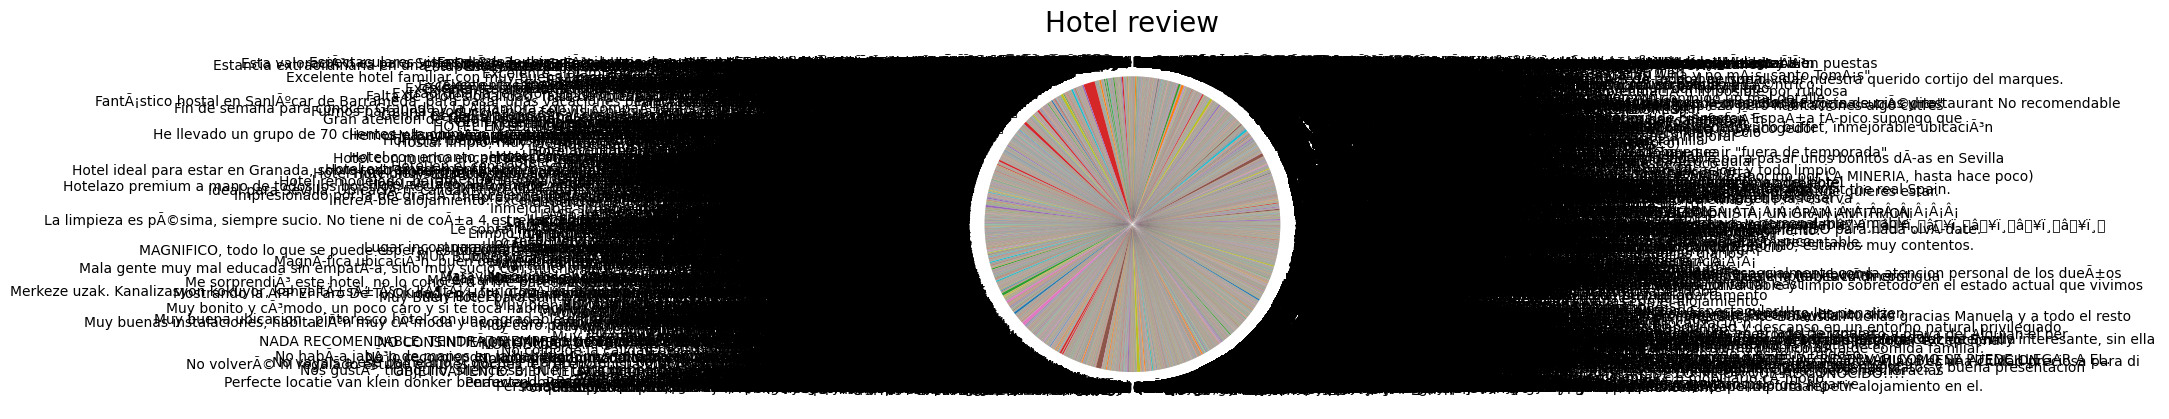

In [15]:
print(data_merge.groupby(['title'])['review_text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['title'])['review_text'].count().plot(kind="pie")
plt.title("Hotel review",size=20)
plt.show()

In [16]:
data = data_merge.drop(["Unnamed: 0","rating","review_text","hotel","label","location"], axis=1)
data.head(10)

,title,class
0,Excelente y personal amable,0
1,CÃ©ntrico,0
2,Hotel excepcional,0
3,WOW!!,0
4,Magnifico,0
5,Mejor hotel de ciudad en Sevilla,0
6,UbicaciÃ³n y comodidad,0
7,Muy buena relaciÃ³n calidad-precio,0
8,Lo mejor su personal,0
9,HOTEL PRECIOSO,0


In [17]:
data=data.sample(frac=1)
data.head(10)

,title,class
1426,ruidoso,1
5540,IncreÃ­ble hotel,1
18124,"lo mejor, la ubicacion",0
528,Sorprendente,0
11727,A beatiful building,0
2113,Un hotel de ciudad,1
3216,Excelente,0
16161,Calidez en todos los sentidos,0
11994,Se ajusta en calidad - precio,0
9122,Un 4 estrella medio al que le falta una puesta...,0


In [18]:
data.isnull().sum()

title    0
class    0
dtype: int64

In [19]:
def filtering(data):
    text=data.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\s+|www\.S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [20]:
data["title"]= data["title"].apply(filtering)
data.head(10)

,title,class
1426,ruidoso,1
5540,increã ble hotel,1
18124,lo mejor la ubicacion,0
528,sorprendente,0
11727,a beatiful building,0
2113,un hotel de ciudad,1
3216,excelente,0
16161,calidez en todos los sentidos,0
11994,se ajusta en calidad precio,0
9122,un estrella medio al que le falta una puesta ...,0


In [21]:
x=data["title"]
y=data["class"]

In [ ]:
 x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)